# RFM

In [2]:
! pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import os
import pandas as pd 

df = pd.read_excel('./data/Online Retail.xlsx')  


In [4]:
df.head(10)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## data cleaning

In [7]:
df = df.drop_duplicates()

## data preprocessing

1. caculate total price

In [8]:
# total price 

df['Total_Price'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [9]:
df['Total_Price'].describe()

count    536641.000000
mean         18.123861
std         380.656263
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: Total_Price, dtype: float64

In [10]:
# total price 負數不合理
df = df[df['Total_Price']>0]
print(len(df))

524878


In [11]:
# customerID 排除 na
df = df[df['CustomerID'].notna()]
print(len(df))

392692


## 分析日期區間

In [12]:
df['InvoiceDate'].describe()

count                           392692
mean     2011-07-10 19:13:07.771892480
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 12:02:00
75%                2011-10-20 12:53:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [13]:
# 定義 Today = 2011-12-10

## caculate RFM

In [14]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [15]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [16]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [17]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [18]:
# find top 10 cutomer based on rfm
rfmTable.sort_values(['monetary_value','frequency', 'recency'], ascending=[False,False,False], inplace=True)
rfmTable.head(10)

# recency 最近購買日，越小越近
# frequency 購買頻率
# monetary_value 購買金額

cust_sorted_based_on_rfm_list = rfmTable.index.tolist()
print(cust_sorted_based_on_rfm_list[0:10])

rfmTable.head(10)

[14646.0, 18102.0, 17450.0, 16446.0, 14911.0, 12415.0, 14156.0, 17511.0, 16029.0, 12346.0]


,recency,frequency,monetary_value
CustomerID,,,
14646.0,1,2076,280206.02
18102.0,0,431,259657.30
17450.0,8,336,194390.79
16446.0,0,3,168472.50
14911.0,1,5670,143711.17
12415.0,24,714,124914.53
14156.0,9,1395,117210.08
17511.0,2,963,91062.38
16029.0,38,241,80850.84


## RFM 應用


In [20]:
import pandas as pd

# 假設 rfmTable 是已經計算好的 DataFrame
# 使用 pd.qcut 進行等分劃分，可以將數據按分位數劃分
rfmTable['R'] = pd.qcut(rfmTable['recency'], 3, labels=[3, 2, 1])
rfmTable['F'] = pd.qcut(rfmTable['frequency'], 3, labels=[1, 2, 3])
rfmTable['M'] = pd.qcut(rfmTable['monetary_value'], 3, labels=[1, 2, 3])

# 合併 R、F、M 結果，得到 RFM 分數
rfmTable['RFM_Score'] = rfmTable['R'].astype(str) + rfmTable['F'].astype(str) + rfmTable['M'].astype(str)

# 查看結果
rfmTable[['recency', 'frequency', 'monetary_value', 'R', 'F', 'M', 'RFM_Score']]


,recency,frequency,monetary_value,R,F,M,RFM_Score
CustomerID,,,,,,,
14646.0,1,2076,280206.02,3,3,3,333
18102.0,0,431,259657.30,3,3,3,333
17450.0,8,336,194390.79,3,3,3,333
16446.0,0,3,168472.50,3,1,3,313
14911.0,1,5670,143711.17,3,3,3,333
...,...,...,...,...,...,...,...
16878.0,84,3,13.30,2,1,1,211
17956.0,249,1,12.75,1,1,1,111
16454.0,44,2,6.90,2,1,1,211


In [21]:
import pandas as pd

# 假設 rfmTable 是已經有 RFM_Score 的 DataFrame
# 定義客戶定位的分類函數
def categorize_customer(row):
    r, f, m = row['R'], row['F'], row['M']
    
    if r == 3 and f == 3 and m == 3:
        return '最有價值的客戶'
    elif r == 1 and f == 1 and m == 1:
        return '低價值客戶/沉睡客戶'
    elif m == 3 and (r == 1 or f == 1):
        return '高價值但近期未購買客戶'
    elif f == 3 and m in [1, 2]:
        return '忠誠客戶'
    else:
        return '其他類型客戶'

# 添加新的定位標籤列
rfmTable['Customer_Segment'] = rfmTable.apply(categorize_customer, axis=1)

# 查看結果
rfmTable[['recency', 'frequency', 'monetary_value', 'RFM_Score', 'Customer_Segment']]


,recency,frequency,monetary_value,RFM_Score,Customer_Segment
CustomerID,,,,,
14646.0,1,2076,280206.02,333,最有價值的客戶
18102.0,0,431,259657.30,333,最有價值的客戶
17450.0,8,336,194390.79,333,最有價值的客戶
16446.0,0,3,168472.50,313,高價值但近期未購買客戶
14911.0,1,5670,143711.17,333,最有價值的客戶
...,...,...,...,...,...
16878.0,84,3,13.30,211,其他類型客戶
17956.0,249,1,12.75,111,低價值客戶/沉睡客戶
16454.0,44,2,6.90,211,其他類型客戶


/var/folders/_x/ct3tt3sd31n9347t3m8_m3xc0000gn/T/ipykernel_912/1278977673.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentages[i]


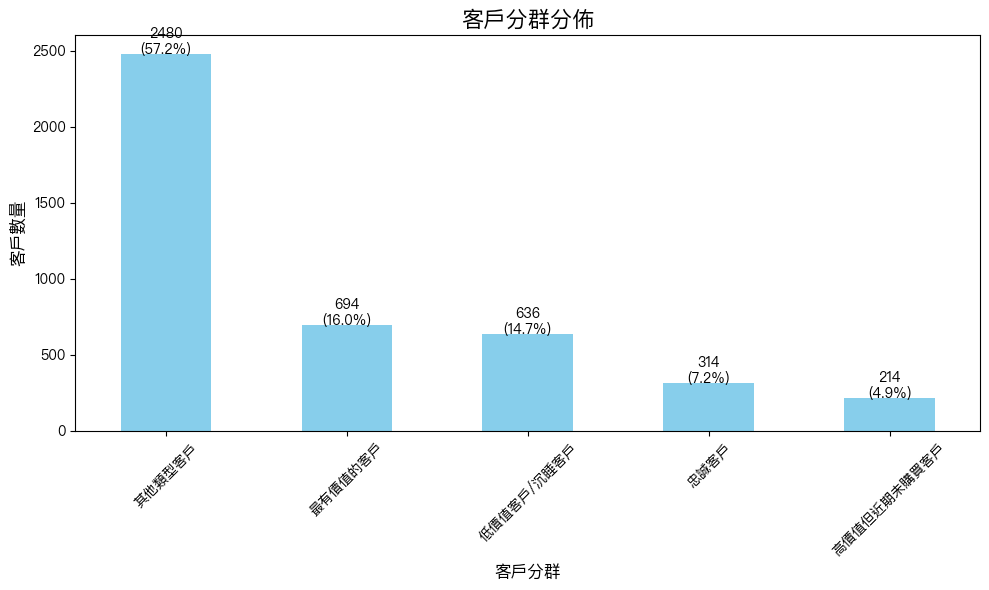

In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 或者使用 ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示的問題

# # 創建長條圖顯示每個客戶分群的數量分佈
# plt.figure(figsize=(10, 6))
# rfmTable['Customer_Segment'].value_counts().plot(kind='bar', color='skyblue')

# # 添加圖表標題和軸標籤
# plt.title('Customer Segment Distribution', fontsize=16)
# plt.xlabel('Customer Segment', fontsize=12)
# plt.ylabel('Number of Customers', fontsize=12)

# # 顯示圖表
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# 計算每個客戶分群的數量和百分比
value_counts = rfmTable['Customer_Segment'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# 創建長條圖
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar', color='skyblue')

# 在長條圖上添加數量和百分比
for i, count in enumerate(value_counts):
    percentage = percentages[i]
    ax.text(i, count + 0.1, f'{count}\n({percentage:.1f}%)', ha='center', fontsize=10)

# 添加圖表標題和軸標籤
plt.title('客戶分群分佈', fontsize=16)
plt.xlabel('客戶分群', fontsize=12)
plt.ylabel('客戶數量', fontsize=12)

# 顯示圖表
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kmeans

In [70]:
! pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 4.4 MB/s eta 0:00:0000:0100:01


In [71]:
## rfm to feature

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [72]:
# try to diviede to 3 cluster
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=3)

In [74]:
import random
import numpy as np 
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [79]:
rfmTable["cluster_new"] = clusters.labels_

In [80]:
rfmTable

,recency,frequency,monetary_value,cluster_new
CustomerID,,,,
14646.0,1,2076,280206.02,0
18102.0,0,431,259657.30,0
17450.0,8,336,194390.79,0
16446.0,0,3,168472.50,0
14911.0,1,5670,143711.17,0
...,...,...,...,...
16878.0,84,3,13.30,1
17956.0,249,1,12.75,2
16454.0,44,2,6.90,1


In [81]:
type(X_scaled)

numpy.ndarray

In [82]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,4.066667,2485.400000,113424.058000
1,40.929386,100.480419,2004.386924
2,246.813889,27.363889,634.834473


In [84]:
rfmTable.groupby('cluster_new' ).describe().T

cluster_new                       0             1             2
recency        count      15.000000   3243.000000   1080.000000
               mean        4.066667     40.929386    246.813889
               std         6.352352     35.575314     66.821630
               min         0.000000      0.000000    140.000000
               25%         0.500000     11.000000    189.000000
               50%         1.000000     30.000000    242.000000
               75%         6.000000     63.000000    298.250000
               max        24.000000    156.000000    373.000000
frequency      count      15.000000   3243.000000   1080.000000
               mean     2485.400000    100.480419     27.363889
               std      2247.634083    133.908680     30.893731
               min         3.000000      1.000000      1.000000
               25%       838.500000     25.000000      9.000000
               50%      1814.000000     56.000000     18.000000
               75%      3544.500000    122.000000     33.000000
               max      7676.000000   1667.000000    297.000000
monetary_value count      15.000000   3243.000000   1080.000000
               mean   113424.058000   2004.386924    634.834473
               std     82084.871060   4218.951629   3025.295377
               min     12076.150000      6.200000      3.750000
               25%     55144.690000    408.610000    169.680000
               50%     91062.380000    919.610000    310.055000
               75%    156091.835000   2083.490000    539.220000
               max    280206.020000  80850.840000  77183.600000

In [92]:
rfmTable

,recency,frequency,monetary_value,cluster_new
CustomerID,,,,
14646.0,1,2076,280206.02,0
18102.0,0,431,259657.30,0
17450.0,8,336,194390.79,0
16446.0,0,3,168472.50,0
14911.0,1,5670,143711.17,0
...,...,...,...,...
16878.0,84,3,13.30,1
17956.0,249,1,12.75,2
16454.0,44,2,6.90,1


In [94]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 3.0 MB/s eta 0:00:0000:0100:01


In [102]:
! pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [138]:
! pip3 install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable


In [139]:
! pip3 install --upgrade plotly


Defaulting to user installation because normal site-packages is not writeable


In [141]:
!pip3 install --force-reinstall nbformat


Defaulting to user installation because normal site-packages is not writeable
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.20.0-cp39-cp39-macosx_10_12_x86_64.whl.metadata (4.2 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
Using cached traitlets-5.14.3-py3-none-any.whl (85 kB)


In [143]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"
fig = px.scatter_3d(rfmTable, x='recency', y='frequency', z='monetary_value',
                    color='cluster_new', title='3D Scatter Plot of Clusters')
fig.show()

In [144]:
import plotly.graph_objects as go

# 創建一個 3D 散點圖
fig = go.Figure(data=[go.Scatter3d(
    x=rfmTable['recency'],
    y=rfmTable['frequency'],
    z=rfmTable['monetary_value'],
    mode='markers',
    marker=dict(
        size=1,  # 設置標記大小
        color=rfmTable['cluster_new'],  # 設置顏色
        colorscale='Viridis',  # 色階
        opacity=0.8  # 透明度
    )
)])

fig.update_layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary Value'
    )
)
fig.show()



In [105]:
! pip install notebook --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached charset_normalizer-3.3.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (33 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.9 MB/s eta 0:00:00a 0:00:01
Using cached argon2_cffi-23.1.0-py3-none-any.whl (15 kB)
Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
   ━━━━━━━━━━━━━━

In [106]:
!pip install plotly --upgrade
!pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.1 MB/s eta 0:00:00a 0:00:01


## use elbow methon to devide cluster

In [85]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [86]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [87]:
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13014.000000
1,2,9421.542432
2,3,7583.216060
3,4,4010.769651
4,5,2960.260424
5,6,2373.800554
6,7,1930.631461
7,8,1825.987048
8,9,1518.215707


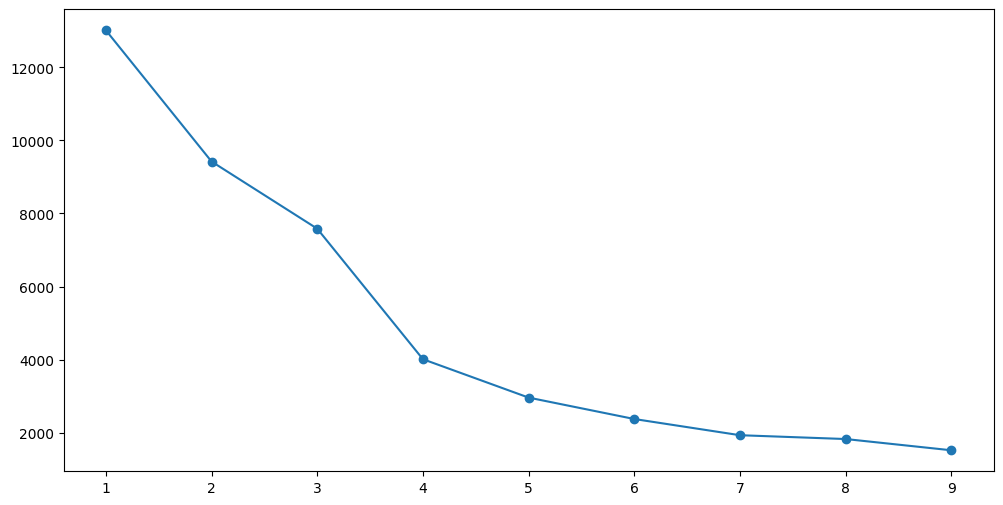

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

以這張圖片來看，在這種情況下，選擇3群或4群都是合理的選擇，但若要最大化每一次增加群數帶來的效益（即最大降低誤差），選擇3群似乎是一個更好的選擇。這是因為在增加到第4群時，誤差下降的幅度較小，意味著每增加一群對於模型改進的貢獻減少。

In [90]:
clusters_df

,num_clusters,cluster_errors
0,1,13014.000000
1,2,9421.542432
2,3,7583.216060
3,4,4010.769651
4,5,2960.260424
5,6,2373.800554
6,7,1930.631461
7,8,1825.987048
8,9,1518.215707


In [2]:
rfmTable

NameError: name 'rfmTable' is not defined

NameError: name 'rfmTable' is not defined

In [127]:
# 計算每個群體的 RFM 平均值
rfm_clusters = rfmTable.groupby('cluster_new').mean()[['recency', 'frequency', 'monetary_value']]
rfm_clusters

,recency,frequency,monetary_value
cluster_new,,,
0,4.066667,2485.400000,113424.058000
1,40.929386,100.480419,2004.386924
2,246.813889,27.363889,634.834473


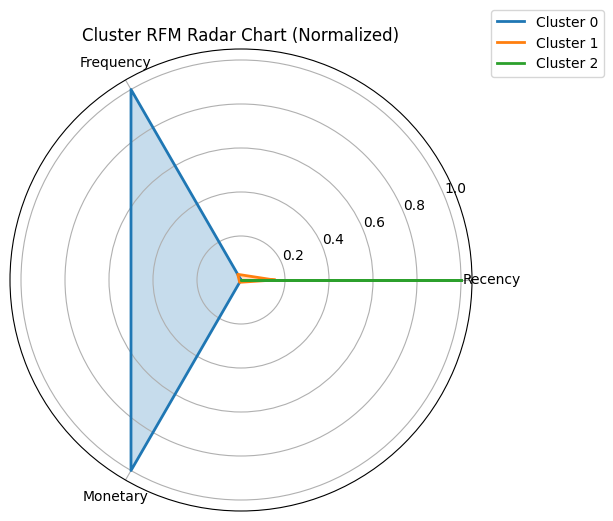

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 範例資料：群體平均 RFM 值
rfm_clusters = {
    'Cluster 0': [4.07, 2485.4, 113424.06],
    'Cluster 1': [40.93, 100.48, 2004.39],
    'Cluster 2': [246.81, 27.36, 634.83]
}

# 將資料轉換為數組
data = np.array(list(rfm_clusters.values()))

# 使用 MinMaxScaler 將數據標準化到 [0, 1] 區間
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# 雷達圖的標籤
labels = ['Recency', 'Frequency', 'Monetary']
num_vars = len(labels)

# 創建雷達圖
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 繪製每個群體的標準化 RFM 平均值
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 將第一個角度再加到最後，使圖形閉合

# 繪製每個群體
for i, (cluster, values) in enumerate(zip(rfm_clusters.keys(), data_normalized)):
    values = values.tolist()  # 轉換成列表
    values += values[:1]  # 將第一個值再添加到最後，使圖形閉合

    # 繪製線條和填充
    ax.plot(angles, values, label=cluster, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# 設置標籤
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 添加圖表標題和圖例
ax.set_title('Cluster RFM Radar Chart (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


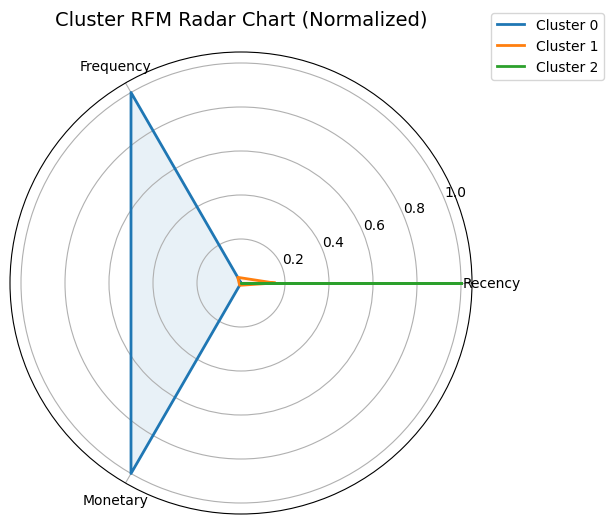

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 範例資料：群體平均 RFM 值
rfm_clusters = {
    'Cluster 0': [4.07, 2485.4, 113424.06],
    'Cluster 1': [40.93, 100.48, 2004.39],
    'Cluster 2': [246.81, 27.36, 634.83]
}

# 將資料轉換為數組
data = np.array(list(rfm_clusters.values()))

# 使用 MinMaxScaler 將數據標準化到 [0, 1] 區間
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# 雷達圖的標籤
labels = ['Recency', 'Frequency', 'Monetary']
num_vars = len(labels)

# 創建雷達圖
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 繪製每個群體的標準化 RFM 平均值
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 將第一個角度再加到最後，使圖形閉合

# 顏色列表和線條粗細
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linewidths = [2, 2, 2]  # 設定每個群體的線條粗細

# 繪製每個群體
for i, (cluster, values) in enumerate(zip(rfm_clusters.keys(), data_normalized)):
    values = values.tolist()  # 轉換成列表
    values += values[:1]  # 將第一個值再添加到最後，使圖形閉合

    # 繪製線條和填充，增加線條粗細和填充透明度
    ax.plot(angles, values, label=cluster, linewidth=linewidths[i], color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.1)  # 調整填充透明度

# 設置標籤
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 添加圖表標題和圖例
ax.set_title('Cluster RFM Radar Chart (Normalized)', size=14, color='black', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


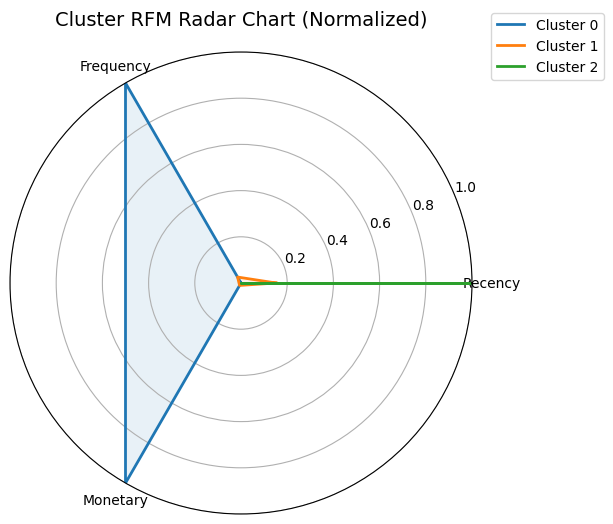

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 範例資料：群體平均 RFM 值
rfm_clusters = {
    'Cluster 0': [4.07, 2485.4, 113424.06],
    'Cluster 1': [40.93, 100.48, 2004.39],
    'Cluster 2': [246.81, 27.36, 634.83]
}

# 將資料轉換為數組
data = np.array(list(rfm_clusters.values()))

# 使用 MinMaxScaler 將數據標準化到 [0, 1] 區間
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# 雷達圖的標籤
labels = ['Recency', 'Frequency', 'Monetary']
num_vars = len(labels)

# 創建雷達圖
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 繪製每個群體的標準化 RFM 平均值
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 將第一個角度再加到最後，使圖形閉合

# 顏色列表和線條粗細
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linewidths = [2, 2, 2]  # 設定每個群體的線條粗細

# 繪製每個群體
for i, (cluster, values) in enumerate(zip(rfm_clusters.keys(), data_normalized)):
    values = values.tolist()  # 轉換成列表
    values += values[:1]  # 將第一個值再添加到最後，使圖形閉合

    # 繪製線條和填充，增加線條粗細和填充透明度
    ax.plot(angles, values, label=cluster, linewidth=linewidths[i], color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.1)  # 調整填充透明度

# 設置標籤
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 調整 y 軸比例範圍
ax.set_ylim(0, 1.0)  # 調整 y 軸的範圍，放大較小值的區別

# 添加圖表標題和圖例
ax.set_title('Cluster RFM Radar Chart (Normalized)', size=14, color='black', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [ ]:
import csv
import os
import multiprocessing

# 定義處理每行數據的函數
def process_line(line, method, delimiter='||', encoding='utf-8'):
    if method == 'split_then_decode':
        parts = line.split(delimiter.encode())  # 先按分隔符切割
        decoded_parts = [part.decode(encoding) for part in parts]  # 再對每部分進行解碼
    elif method == 'decode_then_split':
        decoded_line = line.decode(encoding)  # 先解碼整行
        decoded_parts = decoded_line.split(delimiter)  # 然後進行分割
    else:
        raise ValueError("Invalid method specified.")
    return decoded_parts

# 將處理後的數據寫入對應的日期文件
def write_to_csv(row, date_column, output_dir):
    date = row[date_column]  # 假設日期在某一列
    file_name = f"{date}.csv"  # 根據日期生成文件名
    file_path = os.path.join(output_dir, file_name)

    # 打開文件以附加模式寫入數據
    with open(file_path, mode='a', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(row)

# 定義處理塊的函數
def process_chunk(chunk, delimiter='||', encoding='utf-8', date_column=0, output_dir='output'):
    for line in chunk:
        # 假設每行根據條件判斷處理方式
        method = 'split_then_decode' if some_condition(line) else 'decode_then_split'
        processed_line = process_line(line, method, delimiter, encoding)
        
        # 將處理後的數據寫入對應的 CSV 文件
        write_to_csv(processed_line, date_column, output_dir)

# 逐行讀取 CSV 並分塊處理
def process_file_in_chunks(file_path, chunk_size=10000, delimiter='||', encoding='utf-8', date_column=0, output_dir='output'):
    with open(file_path, 'rb') as f:
        chunk = []
        for line in f:
            chunk.append(line)
            if len(chunk) == chunk_size:
                # 使用多進程池處理塊
                pool.apply_async(process_chunk, (chunk, delimiter, encoding, date_column, output_dir))
                chunk = []  # 清空塊

        # 處理剩餘的行數據
        if chunk:
            pool.apply_async(process_chunk, (chunk, delimiter, encoding, date_column, output_dir))

    pool.close()
    pool.join()

# 示例：條件判斷邏輯
def some_condition(line):
    # 這裡可以根據行數據的特徵來選擇處理方式
    # 示例邏輯：根據行的某些字元判斷
    return b'||' in line

# 主函數
if __name__ == "__main__":
    file_path = 'data.csv'
    output_dir = 'output'
    os.makedirs(output_dir, exist_ok=True)  # 創建輸出目錄

    # 創建進程池
    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    # 處理文件
    process_file_in_chunks(file_path, chunk_size=10000, delimiter='||', encoding='utf-8', date_column=0, output_dir=output_dir)
